In [118]:
import pandas as pd
import numpy as np

In [119]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
med_df = pd.read_csv('medical.csv')

In [122]:
def rmse(target_val, predicted_val):
    return np.sqrt(np.mean(np.square(target_val - predicted_val)))

In [123]:
model = LinearRegression()

In [124]:
non_smoker_df = med_df[med_df.smoker == 'no']
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [125]:
model.fit(inputs, targets)


LinearRegression()

In [126]:
model.predict(np.array([[23],[40],[70]]))

C:\Users\Sanjai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  8598.53595668, 16616.00334162])

In [127]:
predictions = model.predict(inputs)

In [128]:
print(rmse(targets, predictions))
print(model.coef_,model.intercept_)

4662.505766636395
[267.24891283] -2091.4205565650864


RMSE Loss:  4662.505766636395


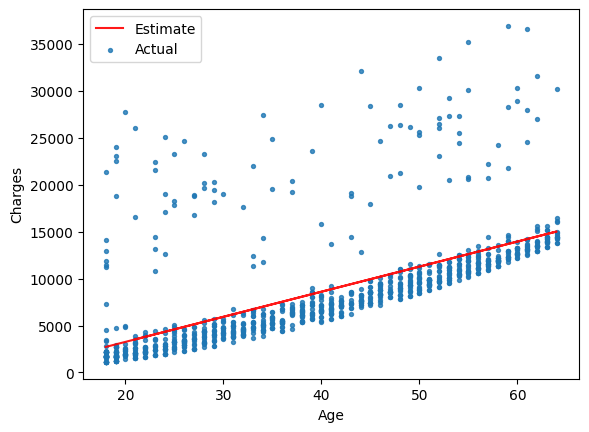

In [129]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    
try_parameters(model.coef_,model.intercept_)

In [130]:
smokers_df = med_df[med_df.smoker == 'yes']
inputs_smokers = smokers_df[['age']]
targets_smokers = smokers_df.charges

In [131]:
model.fit(inputs_smokers,targets_smokers)

LinearRegression()

In [132]:
predictions = model.predict(inputs_smokers)

In [133]:
rmse(targets_smokers, predictions)

np.float64(10711.00334810241)

In [134]:
model.coef_, model.intercept_

(array([305.23760211]), np.float64(20294.12812691597))

RMSE Loss:  10711.00334810241


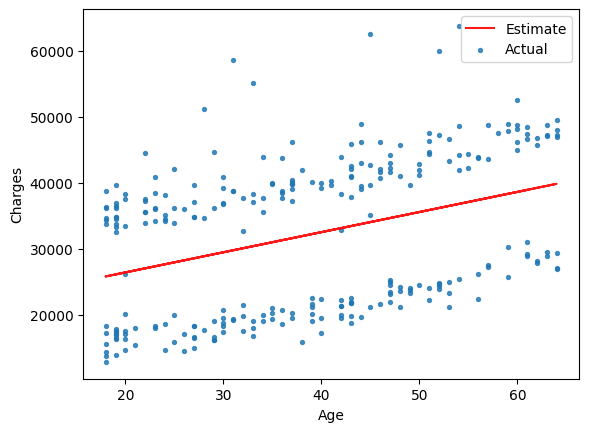

In [135]:
def try_parameters(w, b):
    ages = smokers_df.age
    target = smokers_df.charges
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    
try_parameters(model.coef_,model.intercept_)